In [348]:
import importlib
import random

import visualizations
import copy
import numpy as np
import pickle
import matplotlib.pyplot as plt
importlib.reload(visualizations)
from visualizations import plot_all_datasets_results, plot_bars_for_datasets, generate_bar, plot_horizontal_bootstrap, plot_dict_boxplots

In [349]:
def adjust_results(sim_results):
    """ scaled mean result to show improvement from worst"""
    scaled_res = copy.deepcopy(sim_results)
    datasets_names = list(scaled_res.keys())
    sampling_methods = list(scaled_res[datasets_names[0]])

    # negate the worst result from each result
    for dn in datasets_names:
        min_val = min([scaled_res[dn][sm] for sm in sampling_methods])
        for sm in sampling_methods:
            scaled_res[dn][sm] -= min_val
            scaled_res[dn][sm] *= 100

    return scaled_res

In [350]:
def read_results(path, type_):

    with open(path, 'rb') as file:
        res = pickle.load(file)

    datasets_names = list(res.keys())
    methods_names = list(res[datasets_names[0]][0].keys())

    temp_1 = {dn: {mn: [] for mn in methods_names} for dn in datasets_names}

    for dn in datasets_names:
        for sim_res in res[dn]:
            for mn in sim_res:
                temp_1[dn][mn].append(sim_res[mn])


    detailed_res_ = {dn: {mn: [] for mn in methods_names} for dn in datasets_names}
    for dn in datasets_names:
        for sim_res in res[dn]:
            for mn in sim_res:
                v_mean = [v['mean'] for v in temp_1[dn][mn]]
                v_last = [v['last'] for v in temp_1[dn][mn]]
                detailed_res_[dn][mn] = {'mean': v_mean, 'last': v_last}

    avg_res_ = {dn: {mn: [] for mn in methods_names} for dn in datasets_names}
    for dn in datasets_names:
        for mn in methods_names:
            avg_res_[dn][mn] = np.mean(detailed_res_[dn][mn][type_])

    adj_res_ = copy.deepcopy(avg_res_)
    for dn in datasets_names:
        min_val = min([adj_res_[dn][sm] for sm in methods_names])
        for mn in methods_names:
            adj_res_[dn][mn] -= min_val
            adj_res_[dn][mn] *= 100

    return detailed_res_, avg_res_, adj_res_

In [351]:
def get_overall_results(res_dict):
    datasets_names = list(res_dict.keys())
    sampling_methods_used = list(res_dict[datasets_names[0]].keys())

    overall_results = {sm: 0 for sm in sampling_methods_used}
    for dn in datasets_names:
        for sm in sampling_methods_used:
            overall_results[sm] += res_dict[dn][sm]
    return overall_results

# Last Iterations Result

In [352]:
res_path = r"results/results_partial_labeling_4k_s=100.pkl"
detailed_res, avg_res, adj_res = read_results(res_path, type_='last')

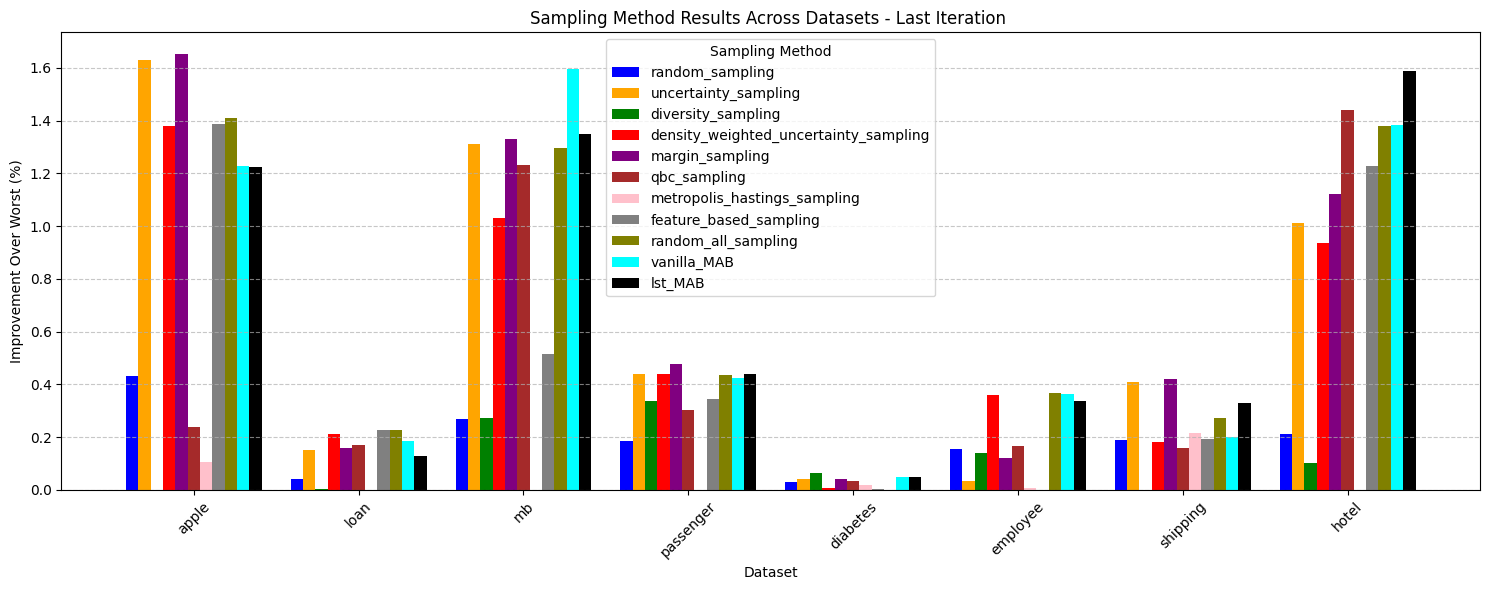

In [353]:
plot_all_datasets_results(adj_res, title='Sampling Method Results Across Datasets - Last Iteration ',
                          xlabel='Dataset', ylabel='Improvement Over Worst (%)')

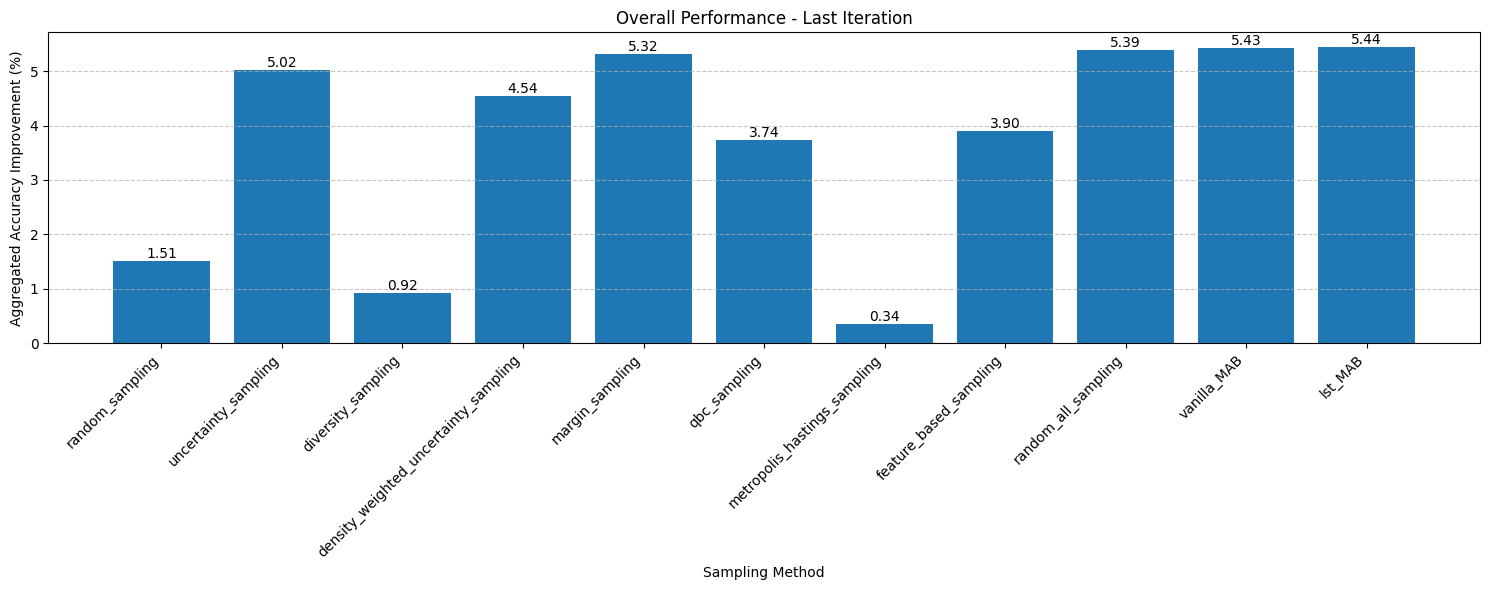

In [354]:
overall_results = get_overall_results(adj_res)
generate_bar(overall_results, title='Overall Performance - Last Iteration')

In [355]:
temp_res = {}

for k1 in detailed_res:
    temp_res[k1] = {}
    for k2 in detailed_res[k1]:
        temp_res[k1][k2] = detailed_res[k1][k2]['last']

means_stds = {}
for k in temp_res:
    means_stds[k] = {}
    print(f"{k} data set")
    for s in temp_res[k]:

        print(f"\t-{s} mean: {np.mean(temp_res[k][s])*100:.3f}, std: {np.std(temp_res[k][s])*100:.3f}")

apple data set
	-random_sampling mean: 82.666, std: 1.949
	-uncertainty_sampling mean: 83.861, std: 1.975
	-diversity_sampling mean: 82.233, std: 2.066
	-density_weighted_uncertainty_sampling mean: 83.614, std: 1.920
	-margin_sampling mean: 83.885, std: 1.969
	-qbc_sampling mean: 82.472, std: 1.834
	-metropolis_hastings_sampling mean: 82.338, std: 1.947
	-feature_based_sampling mean: 83.620, std: 1.864
	-random_all_sampling mean: 83.643, std: 1.836
	-vanilla_MAB mean: 83.461, std: 1.812
	-lst_MAB mean: 83.457, std: 1.902
loan data set
	-random_sampling mean: 90.659, std: 1.585
	-uncertainty_sampling mean: 90.768, std: 1.624
	-diversity_sampling mean: 90.623, std: 1.570
	-density_weighted_uncertainty_sampling mean: 90.829, std: 1.584
	-margin_sampling mean: 90.778, std: 1.619
	-qbc_sampling mean: 90.788, std: 1.640
	-metropolis_hastings_sampling mean: 90.618, std: 1.585
	-feature_based_sampling mean: 90.846, std: 1.554
	-random_all_sampling mean: 90.845, std: 1.576
	-vanilla_MAB mean: 9

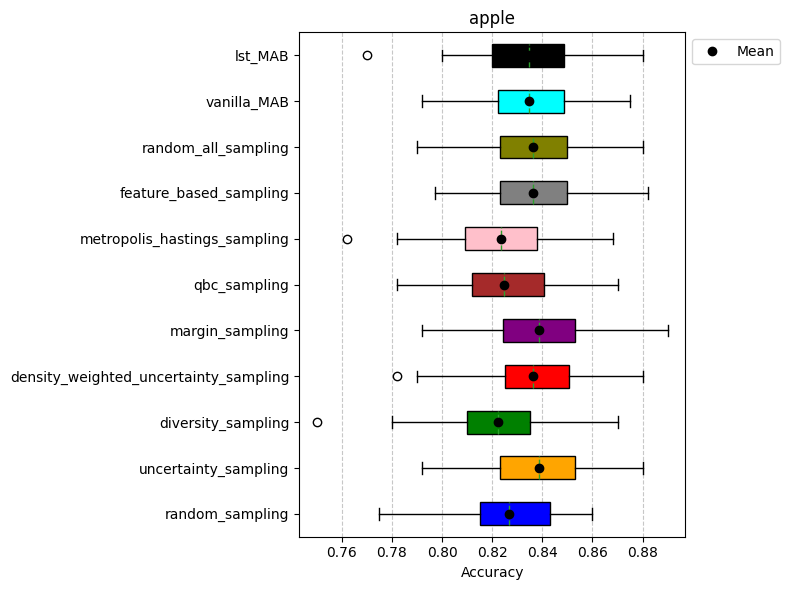

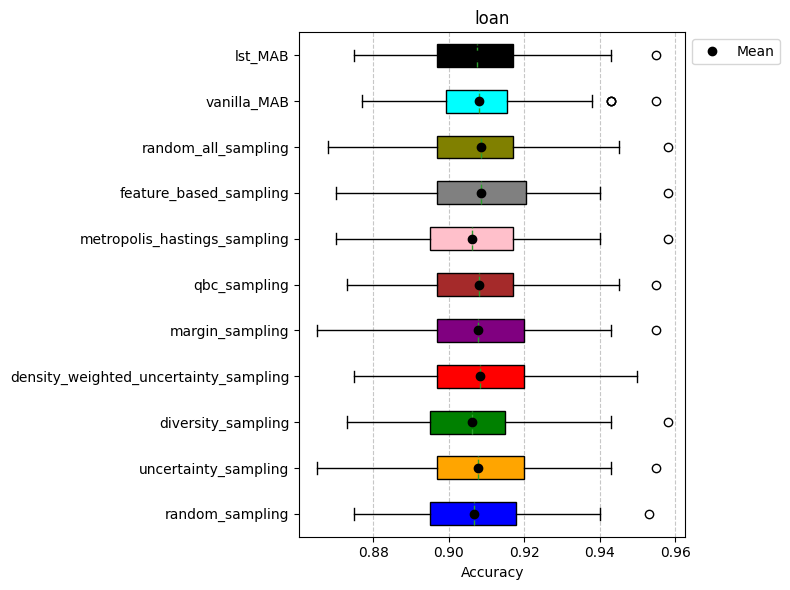

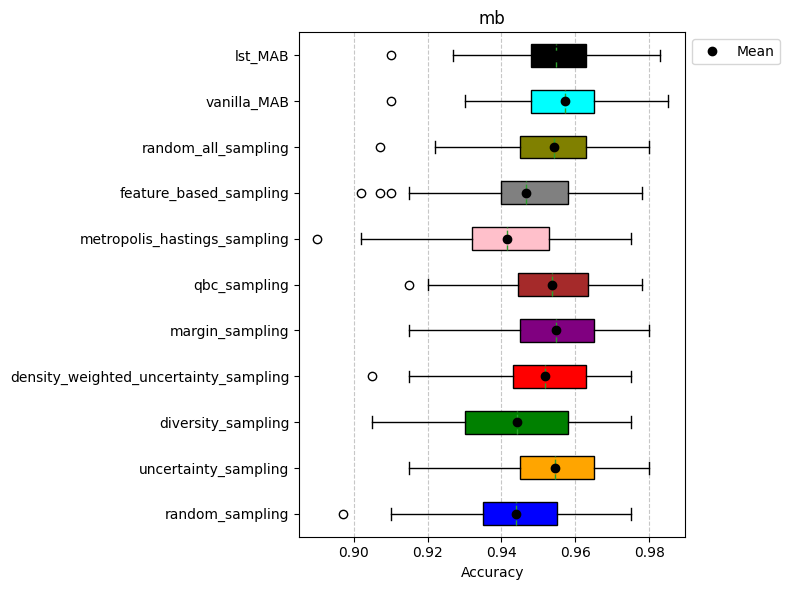

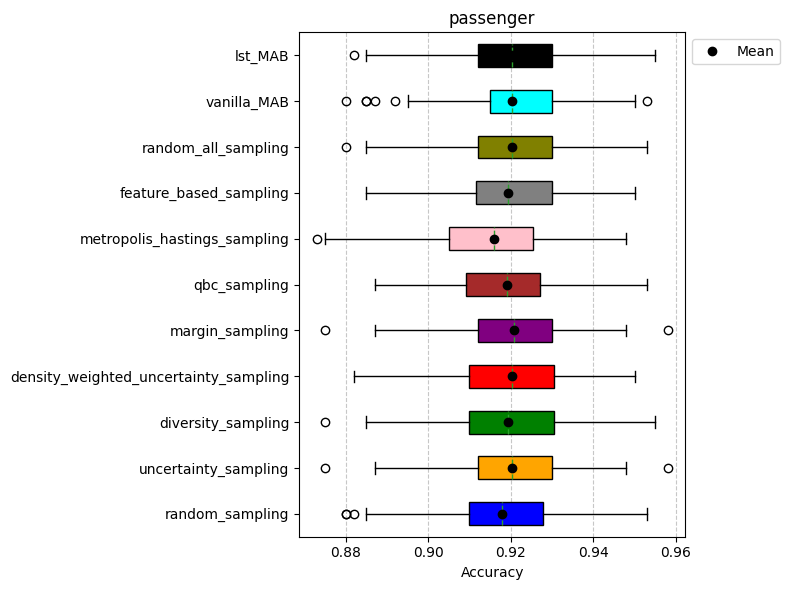

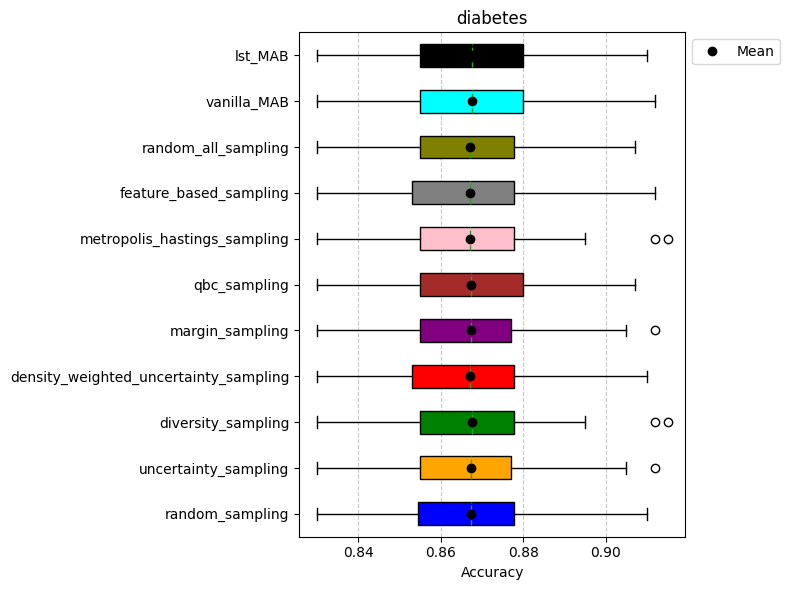

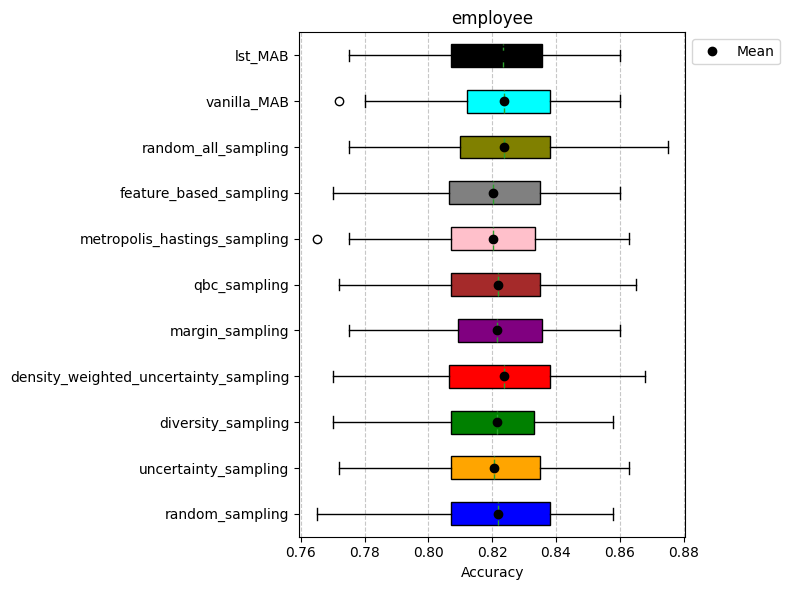

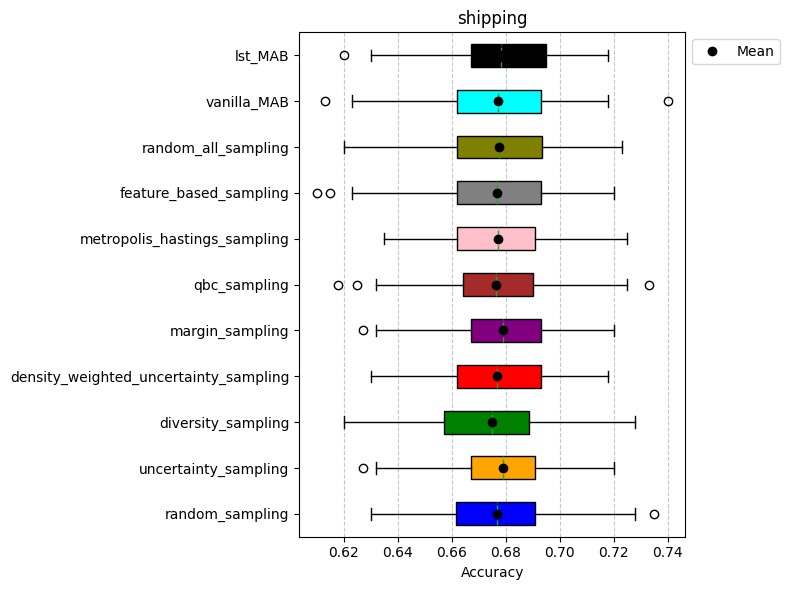

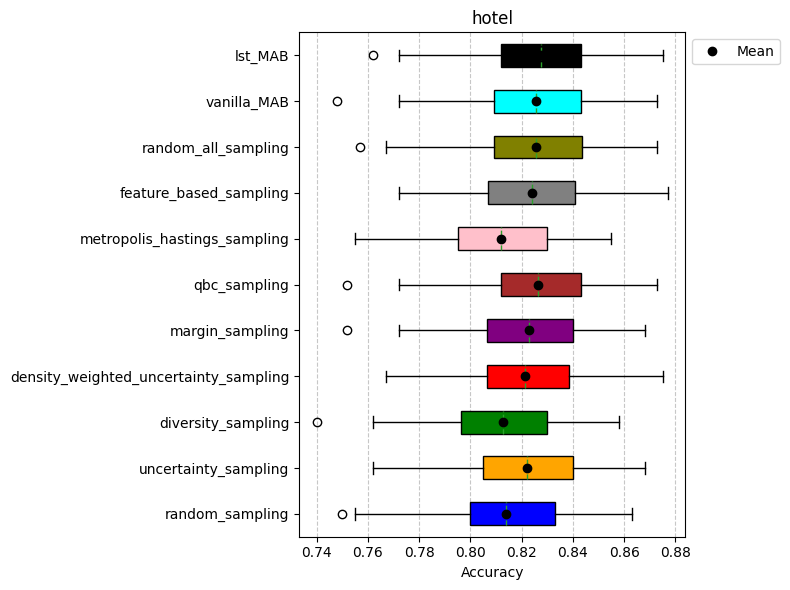

In [356]:
for k in temp_res:
    plot_dict_boxplots(temp_res[k], name=k)

# Mean Iteration Results

In [357]:
res_path = r"results/results_partial_labeling_4k_s=100.pkl"
detailed_res, avg_res, adj_res = read_results(res_path, type_='mean')

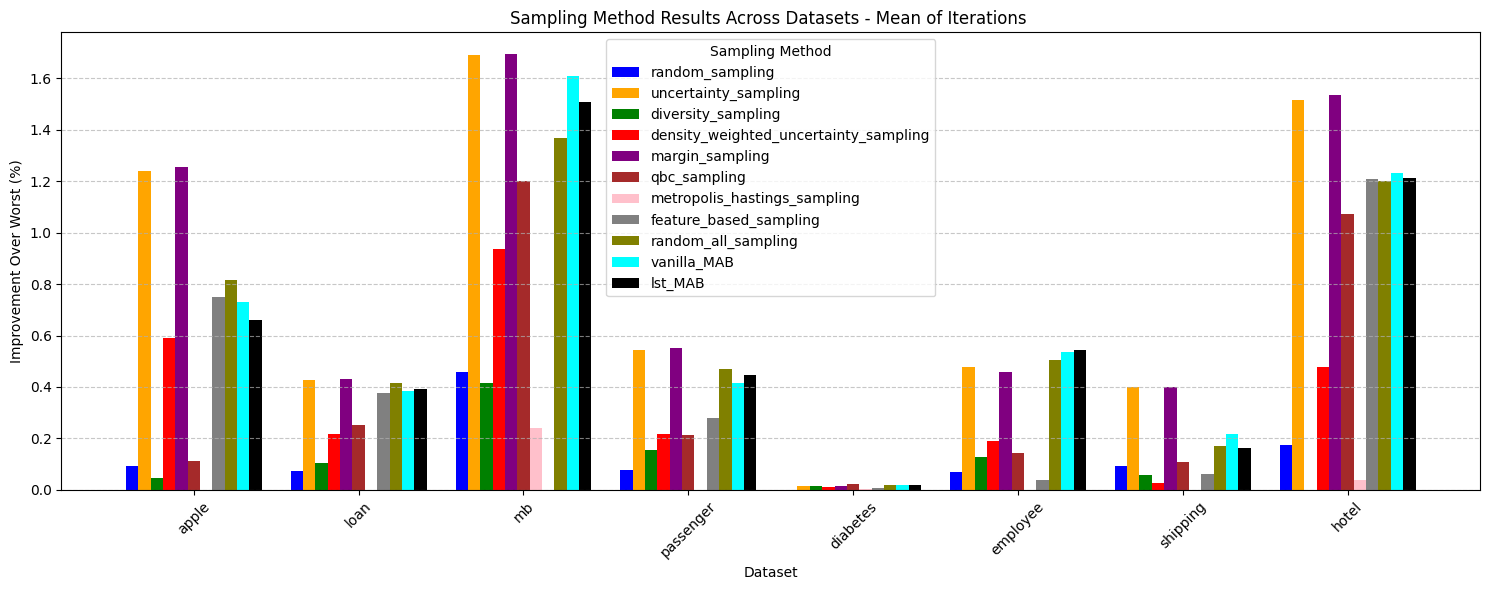

In [358]:
plot_all_datasets_results(adj_res, title='Sampling Method Results Across Datasets - Mean of Iterations ',
                          xlabel='Dataset', ylabel='Improvement Over Worst (%)')

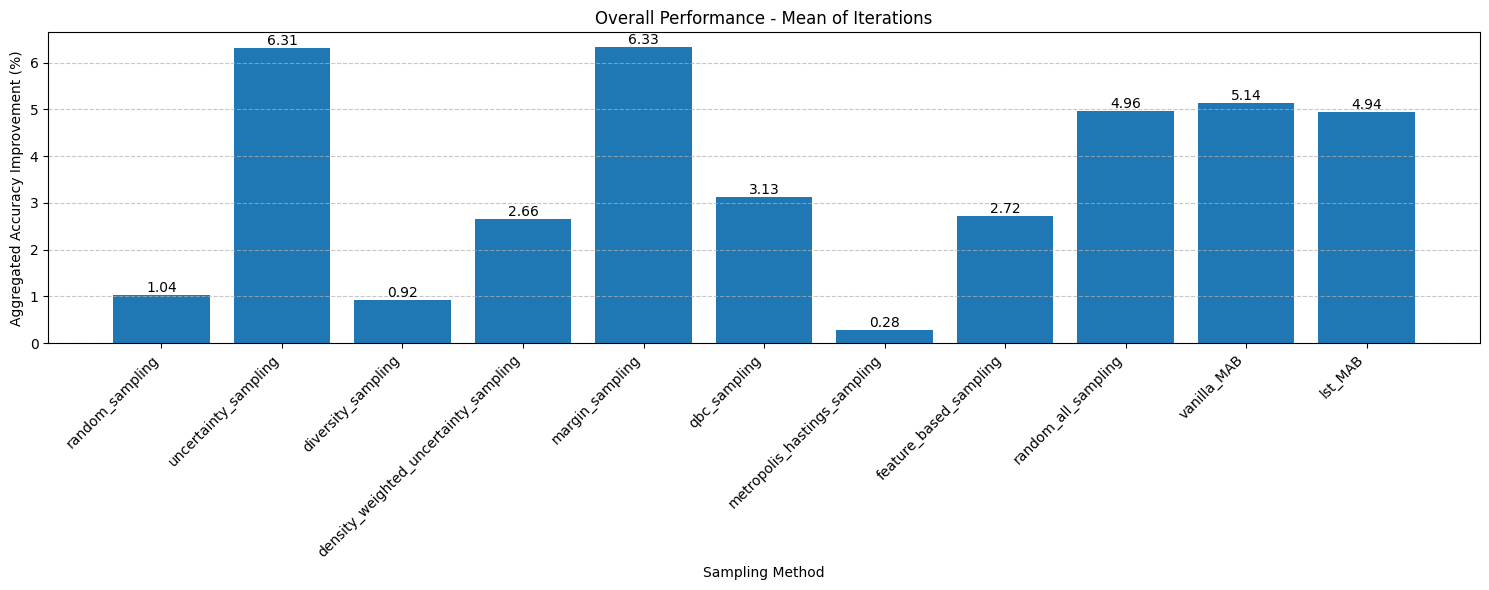

In [359]:
overall_results = get_overall_results(adj_res)
generate_bar(overall_results, title='Overall Performance - Mean of Iterations')

In [360]:
temp_res = {}

for k1 in detailed_res:
    temp_res[k1] = {}
    for k2 in detailed_res[k1]:
        temp_res[k1][k2] = detailed_res[k1][k2]['mean']

means_stds = {}
for k in temp_res:
    means_stds[k] = {}
    print(f"{k} data set")
    for s in temp_res[k]:

        print(f"\t-{s} mean: {np.mean(temp_res[k][s])*100:.3f}, std: {np.std(temp_res[k][s])*100:.3f}")

apple data set
	-random_sampling mean: 82.425, std: 1.735
	-uncertainty_sampling mean: 83.573, std: 1.547
	-diversity_sampling mean: 82.378, std: 1.763
	-density_weighted_uncertainty_sampling mean: 82.925, std: 1.662
	-margin_sampling mean: 83.588, std: 1.557
	-qbc_sampling mean: 82.446, std: 1.668
	-metropolis_hastings_sampling mean: 82.333, std: 1.763
	-feature_based_sampling mean: 83.081, std: 1.622
	-random_all_sampling mean: 83.149, std: 1.598
	-vanilla_MAB mean: 83.064, std: 1.642
	-lst_MAB mean: 82.995, std: 1.620
loan data set
	-random_sampling mean: 90.531, std: 1.512
	-uncertainty_sampling mean: 90.882, std: 1.471
	-diversity_sampling mean: 90.562, std: 1.493
	-density_weighted_uncertainty_sampling mean: 90.672, std: 1.463
	-margin_sampling mean: 90.886, std: 1.468
	-qbc_sampling mean: 90.709, std: 1.451
	-metropolis_hastings_sampling mean: 90.456, std: 1.528
	-feature_based_sampling mean: 90.831, std: 1.476
	-random_all_sampling mean: 90.872, std: 1.525
	-vanilla_MAB mean: 9

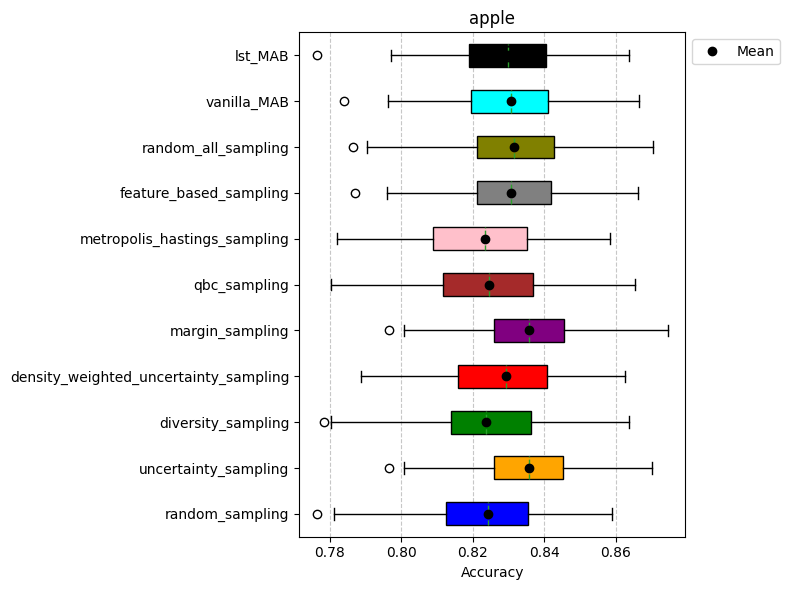

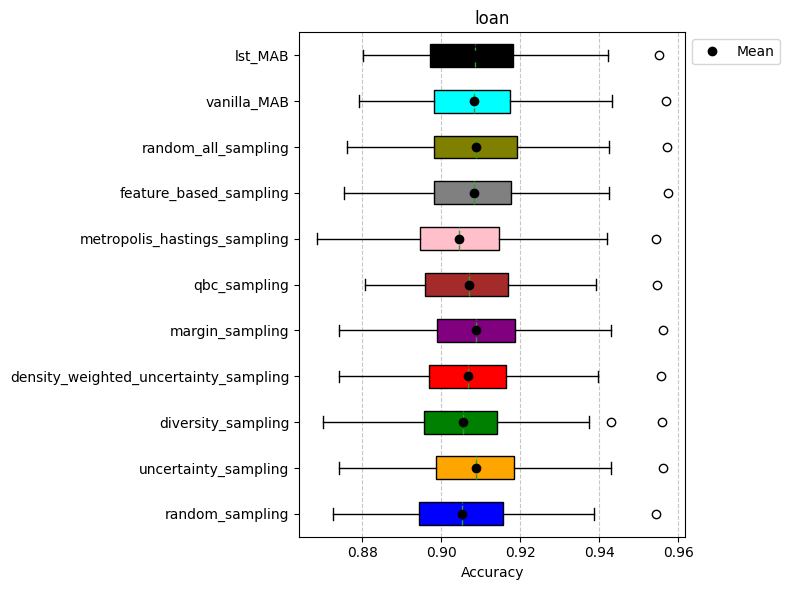

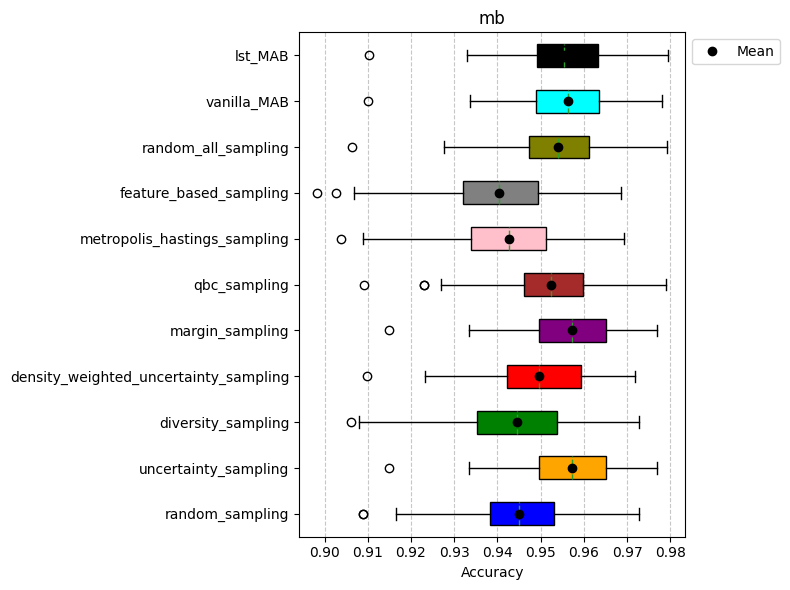

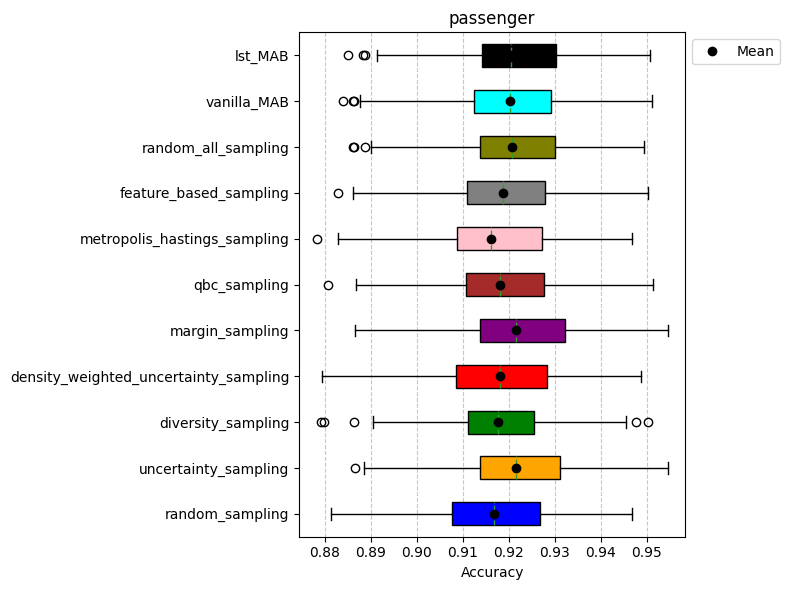

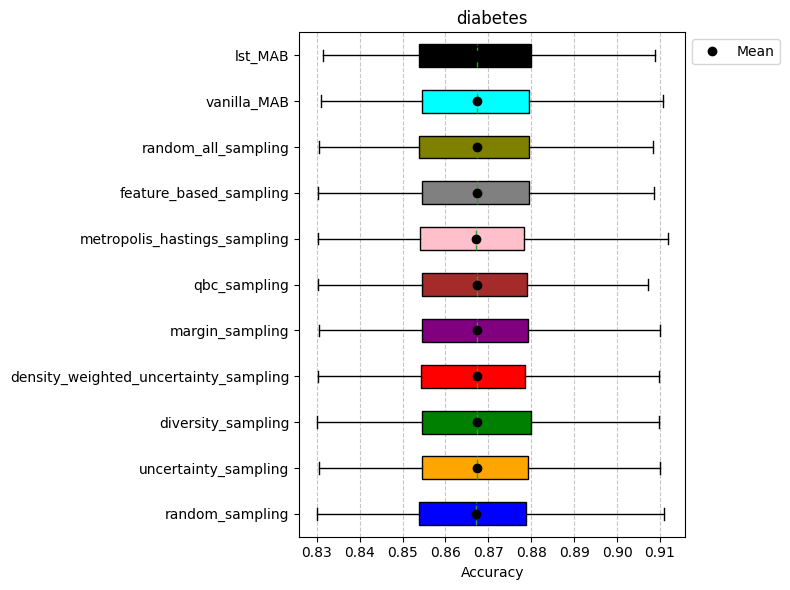

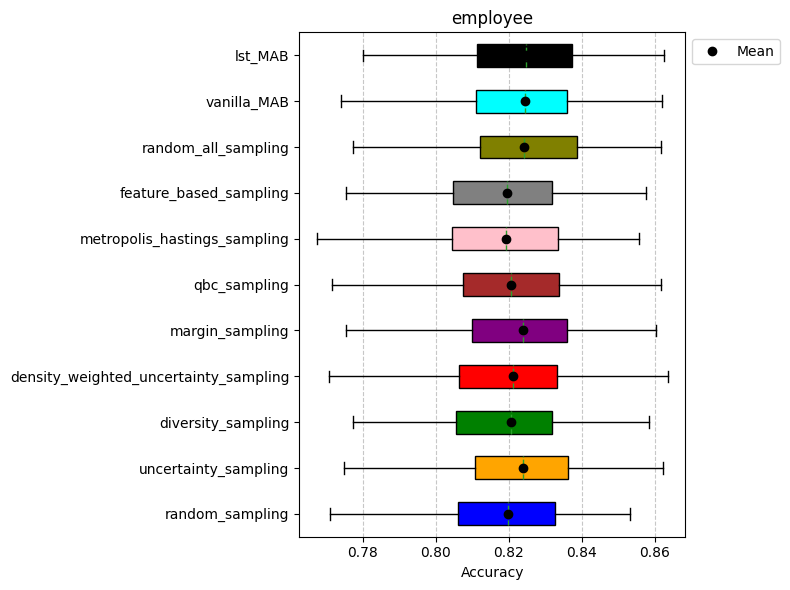

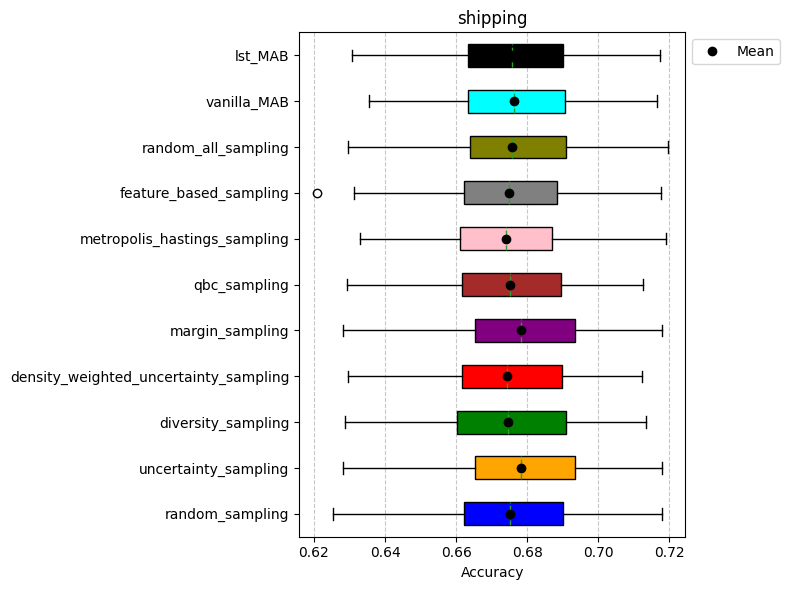

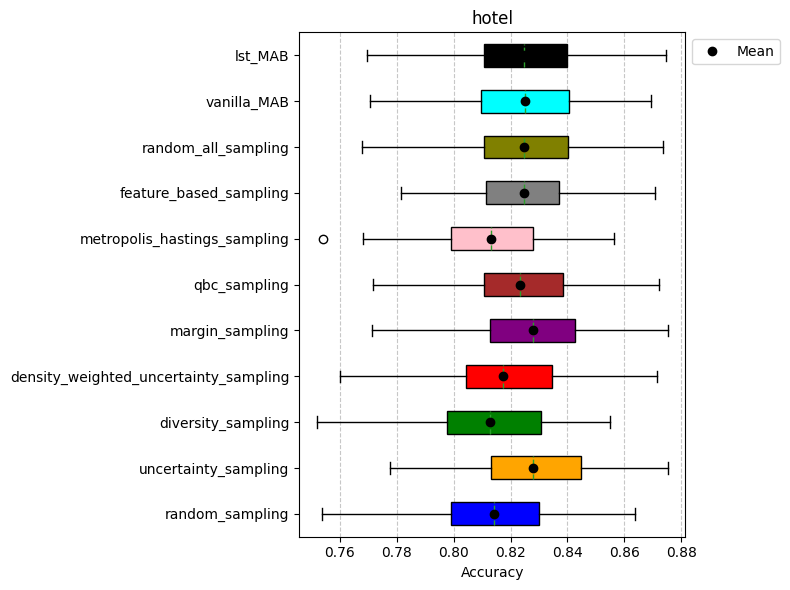

In [361]:
for k in temp_res:
    plot_dict_boxplots(temp_res[k], name=k)